In [4]:
import json
import pandas as pd

In [5]:
path = "/afs/cern.ch/work/j/jcapotor/software/rtd/src/data/mapping/sensor_dict.json"

In [7]:
# Load JSON manually
with open(path, "r") as file:
    data = json.load(file)

# Convert dictionary to DataFrame
df = pd.DataFrame(list(data.items()), columns=["ID", "Sensor_Name"])

# Display the first few rows
print(df.head())

           ID                                       Sensor_Name
0  6828332826  NP04_DCS_01:_DistSync.Historical.HandshakeByUser
1  6828333082        NP04_DCS_01:_DistSync.Historical.StartTime
2  6828333338          NP04_DCS_01:_DistSync.Historical.EndTime
3  6828333594         NP04_DCS_01:_DistSync.Historical.SyncData
4  6828333850           NP04_DCS_01:_DistSync.Historical.Result


In [48]:
item = df.loc[df["Sensor_Name"].apply(lambda x: "4PDT4925" in x if pd.notnull(x) else False)]
print(item["ID"].values, item["Sensor_Name"].values)

['47931818246426'] ['NP04_DCS_01:NP04_4PDT4925.']


In [1]:
import subprocess, json, datetime, tqdm

In [3]:
dates = []
start_date = datetime.datetime(2024, 3, 1)
#end_date = datetime.datetime(2024, 3, 3)
end_date = datetime.datetime(2025, 3, 12)
while start_date <= end_date:
    dates.append(datetime.datetime.strftime(start_date, "%Y-%m-%d"))
    start_date += datetime.timedelta(days=1)

In [4]:
with open('/afs/cern.ch/work/j/jcapotor/software/rtd/src/data/mapping/dates_to_extract.txt', 'w') as file:
    for date in dates:
        file.write(date + "\n")

In [31]:
import pandas as pd
path = "/eos/user/j/jcapotor/PDHDdata/data/2024-03-05.csv"
data = pd.read_csv(path)
data = data.set_index("Unnamed: 0")
data.index = pd.to_datetime(data.index)

In [32]:
print(data.head())

                         TE0001      TE0002      TE0003      TE0004  \
Unnamed: 0                                                            
2024-03-05 02:00:00  303.706282  303.746236  303.893801  303.932756   
2024-03-05 02:01:00  303.705146  303.744972  303.892003  303.931028   
2024-03-05 02:02:00  303.705194  303.743027  303.890228  303.929730   
2024-03-05 02:03:00  303.703341  303.740608  303.887881  303.927561   
2024-03-05 02:04:00  303.699148  303.738320  303.886143  303.925791   

                         TE0005      TE0006      TE0007      TE0008  \
Unnamed: 0                                                            
2024-03-05 02:00:00  303.854040  303.751214  303.673174  303.734673   
2024-03-05 02:01:00  303.852517  303.749630  303.671951  303.733483   
2024-03-05 02:02:00  303.851166  303.748251  303.670483  303.732137   
2024-03-05 02:03:00  303.849101  303.746076  303.668312  303.729353   
2024-03-05 02:04:00  303.846991  303.743756  303.665927  303.727570   

    

In [33]:
import matplotlib.pyplot as plt

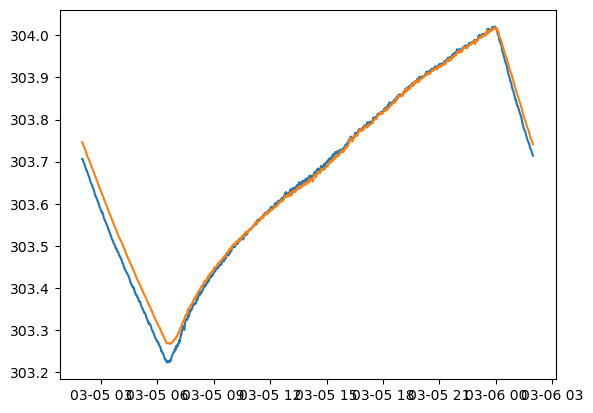

In [34]:
plt.plot(data.index.to_numpy(), data["TE0001"].to_numpy())
plt.plot(data.index.to_numpy(), data["TE0002"].to_numpy())